# **02 - DataPreperation**

## Objectives

* Clean data - Remove non image files from dataset.
* Split data - Split dataset into 'test', 'train' and 'validation' sets.
* Check data for imbalance - Check all data subsets for imbalance between labels to determine if their is cause for under-sampling or over-sampling.
* Check image sizes - Check images sizes to determine if their is caus for action to resize for uniform dataset.

## Inputs

* Raw dataset - The dataset provided by the client, collected and stored in "directory /inputs/cherry_leaves_dataset/cherry-leaves", outputed from notebook "01 - DataCollection"

## Outputs

* Plot showing data balance
* Plot showing image size variation

## Additional Comments

* No additional comments. 



---

## Change working directory

Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

The output from the below cell should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspace/Mildew-Detection-in-Cherry-Leaves'

## Set input directory

In [2]:
data_dir = '/workspace/Mildew-Detection-in-Cherry-Leaves/inputs/cherry_leaves_dataset/cherry-leaves'

## Set output directory

In [3]:
# declare the name of your output folder
output_dir = 'current_output'

In [4]:
if 'outputs' not in os.listdir(current_dir):
    os.makedirs(name='outputs')

def create_output_dir(output_dir):
    try:
        os.makedirs(name=f'outputs/{output_dir}')
        print(f'Current output folder is {output_dir}')
        return f'outputs/{output_dir}'
    except:
        print(f'Current output folder is {output_dir}. Note that this is an already existing folder.')
        return f'outputs/{output_dir}'
version_output = create_output_dir(output_dir)


Current output folder is current_output. Note that this is an already existing folder.


---

# Clean Data

## Filtering out non image files

In [5]:
healthy_leaves='inputs/cherry_leaves_dataset/cherry-leaves/healthy'
powdery_mildew='inputs/cherry_leaves_dataset/cherry-leaves/powdery_mildew'
file_extension = ('.png', '.jpg', '.jpeg')

def drop_non_imgs(folder):
    files = os.listdir(folder)
    non_img_counter = 0
    for file in files:
        if not file.lower().endswith(file_extension):
            file_path = folder + '/' + file
            os.remove(file_path)
            non_img_counter =+ 1
        else:
            pass
    print(f"{folder} contained {non_img_counter} non image files before removal")

drop_non_imgs(healthy_leaves)
drop_non_imgs(powdery_mildew)

inputs/cherry_leaves_dataset/cherry-leaves/healthy contained 0 non image files before removal
inputs/cherry_leaves_dataset/cherry-leaves/powdery_mildew contained 0 non image files before removal


## Split dataset into train-, validation- and test-set

* Set the ratio for train-, validation- and test-sets

In [6]:
train_set_ratio = 0.7
validation_set_ratio = 0.1
test_set_ratio = 0.2

ratio_sum = round(train_set_ratio + validation_set_ratio + test_set_ratio, 2)
if not ratio_sum == 1:
    print(f'WARNING: The sum of the ratios must be 1. It is currently {ratio_sum} and need to be corrected.')
else:
    print('Data set ratio is set.')


Data set ratio is set.


* Create the new train, validation and test folders within the dataset directory

In [8]:
data_labels = os.listdir(data_dir)
folder_names = ['train', 'validation', 'test']

for foldername in folder_names:
    for data_label in data_labels:
        os.makedirs(name=data_dir + '/' + foldername + '/' + data_label)

* Split and move the data to the new folders and delete the previous folders

In [9]:
import shutil
import random

for data_label in data_labels:
    data = os.listdir(data_dir + '/' + data_label)
    random.shuffle(data)

    train_data_amount = round(len(data) * train_set_ratio)
    validation_data_amount = round(len(data) * validation_set_ratio)
    
    for img in data:
        if len(os.listdir(data_dir + '/train/' + data_label)) <= train_data_amount:
            shutil.move(data_dir + '/' + data_label + '/' + img,
                        data_dir + '/train/' + data_label + '/' + img)
        elif len(os.listdir(data_dir + '/validation/' + data_label)) <= validation_data_amount:
            shutil.move(data_dir + '/' + data_label + '/' + img,
                        data_dir + '/validation/' + data_label + '/' + img)           
        else:
            shutil.move(data_dir + '/' + data_label + '/' + img,
                        data_dir + '/test/' + data_label + '/' + img)

    os.rmdir(data_dir + '/' + data_label)

## Check for Data Imbalance

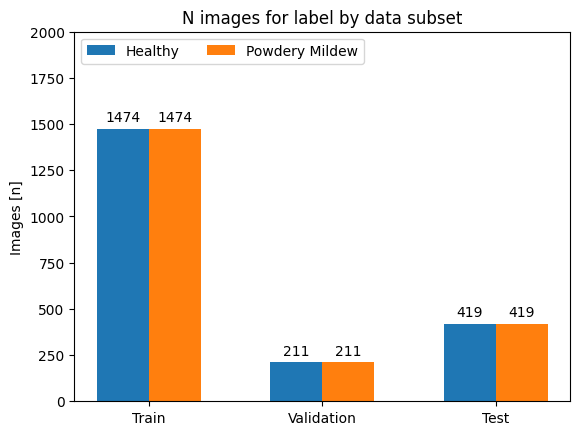

In [10]:
import matplotlib.pyplot as plt
import numpy as np

train_healthy = len(os.listdir(data_dir + '/train/healthy'))
train_powdery_mildew = len(os.listdir(data_dir + '/train/powdery_mildew'))
val_healthy = len(os.listdir(data_dir + '/validation/healthy'))
val_powdery_mildew = len(os.listdir(data_dir + '/validation/powdery_mildew'))
test_healthy = len(os.listdir(data_dir + '/test/healthy'))
test_powdery_mildew = len(os.listdir(data_dir + '/test/powdery_mildew'))

dataset = ('Train', "Validation", "Test")
penguin_means = {
    'Healthy': (train_healthy, val_healthy, test_healthy),
    'Powdery Mildew': (train_powdery_mildew, val_powdery_mildew, test_powdery_mildew),
}

x = np.arange(len(dataset))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout=None)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images [n]')
ax.set_title('N images for label by data subset')
ax.set_xticks(x + (width/2), dataset)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2000)
plt.savefig(fname=version_output+'/dataset_balance')
plt.show()

## Check image sizes

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import joblib

from matplotlib.image import imread

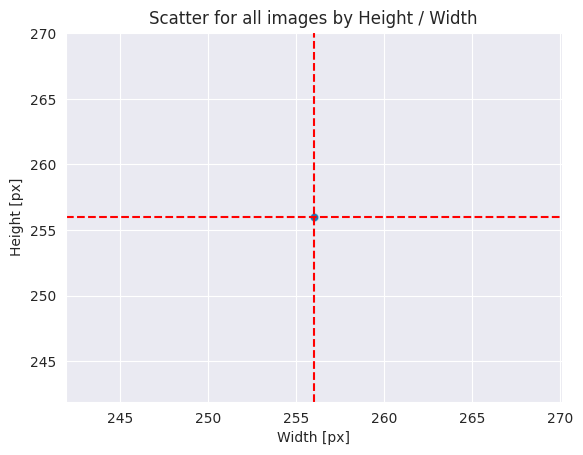

Width average: 256 
Height average: 256


In [12]:
img_width, img_height = [], []
subset_dirs = ['/train/', '/validation/', '/test/']
for folder in subset_dirs:
  for label in data_labels:
    for img_file in os.listdir(data_dir + folder + label):
      img = imread(data_dir + folder + label + '/' + img_file, 0)
      img_shape = img.shape
      img_width.append(img_shape[1])
      img_height.append(img_shape[0])


fig, axes = plt.subplots()
sns.scatterplot(x=img_width, y=img_height, alpha=0.2)
axes.set_title('Scatter for all images by Height / Width')
axes.set_xlabel("Width [px]")
axes.set_ylabel("Height [px]")
img_width_mean = int(np.array(img_width).mean())
img_height_mean = int(np.array(img_height).mean())
axes.axvline(x=img_width_mean,color='r', linestyle='--')
axes.axhline(y=img_height_mean,color='r', linestyle='--')
plt.savefig(fname=version_output+'/scatterplot_img_sizes')
plt.show()
print(f"Width average: {img_width_mean} \nHeight average: {img_height_mean}")

---

# Conclusions and Next Steps

* Data is balanced and no cause for action.
* Images are of uniform size 256px X 256 px and no resizing is required.
  * Image size will be managed in notebook "04 - Modelling", in order to control ratio of model performance/model size. 